# Visualize Robomimic Data

In [3]:
import robomimic.utils.file_utils as FileUtils

dataset_dir = '/Users/meeroro/workspace/bimanual_imitation/diffusion_policy/robomimic_transport/data/transport/ph/demo_v141.hdf5'
env_meta = FileUtils.get_env_metadata_from_dataset(dataset_dir)

print(env_meta)

{'type': 1, 'env_name': 'TwoArmTransport', 'env_kwargs': {'has_renderer': False, 'has_offscreen_renderer': False, 'ignore_done': True, 'use_object_obs': True, 'use_camera_obs': False, 'reward_shaping': False, 'control_freq': 20, 'controller_configs': {'type': 'OSC_POSE', 'input_max': 1, 'input_min': -1, 'output_max': [0.05, 0.05, 0.05, 0.5, 0.5, 0.5], 'output_min': [-0.05, -0.05, -0.05, -0.5, -0.5, -0.5], 'kp': 150, 'damping': 1, 'impedance_mode': 'fixed', 'kp_limits': [0, 300], 'damping_limits': [0, 10], 'position_limits': None, 'orientation_limits': None, 'uncouple_pos_ori': True, 'control_delta': True, 'interpolation': None, 'ramp_ratio': 0.2}, 'robots': ['Panda', 'Panda'], 'env_configuration': 'single-arm-opposed', 'camera_names': 'agentview', 'camera_depths': False, 'camera_heights': 84, 'camera_widths': 84}, 'env_version': '1.4.1'}


In [3]:
from diffusion_policy.robomimic_transport.dataset import RobomimicImageDataset

task_data_dir = '/Users/meeroro/workspace/bimanual_imitation/diffusion_policy/robomimic_transport/data/transport/ph/image_dataset.hdf5'
dataset = RobomimicImageDataset(task_data_dir, pred_horizon=16, obs_horizon=2, action_horizon=8)
print(f'Number of samples: {len(dataset)}')
print(f'Number of images: {len(dataset.train_data["image_front"])}')
print(f'Number of agent positions: {len(dataset.train_data["agent_pos"])}')
print(f'Number of actions: {len(dataset.train_data["action"])}')
print(f'Indices: {dataset.indices}')

hdf5 file /Users/meeroro/workspace/bimanual_imitation/diffusion_policy/robomimic_transport/data/transport/ph/image_dataset.hdf5 has 200 demonstrations


100%|██████████| 10/10 [00:00<00:00, 15.51it/s]


10 episodes successfully loaded.
Dataset created successfully
Number of samples: 4636
Number of samples: 4636
Number of images: 4706
Number of agent positions: 4706
Number of actions: 4706
Indices: [[   0   15    1   16]
 [   0   16    0   16]
 [   1   17    0   16]
 ...
 [4695 4706    0   11]
 [4696 4706    0   10]
 [4697 4706    0    9]]


In [4]:
# Load the first sample
sample = dataset[230]

for key, value in sample.items():
    print(key, value.shape)

agent_pos (2, 18)
action (16, 14)
image_front (2, 128, 128, 3)


uint8


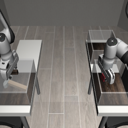

In [29]:
from PIL import Image
import numpy as np 

img = sample['image_front'][0] * 255
img = img.astype(np.uint8) 
print(img.dtype)
img = Image.fromarray(img) 
display(img)


In [42]:
import cv2 
import numpy as np 

def decode_image(image): 

    image = image * 255
    image = image.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # image = Image.fromarray(image)

    return image

print(dataset.train_data['image_front'].shape)

frames = map(decode_image, dataset.train_data['image_front'])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# change the output file name 
out = cv2.VideoWriter('robomimic_test_video.mp4', fourcc, 30.0, (128, 128))

for frame in frames: 
    out.write(frame)  

out.release() 

(4706, 128, 128, 3)
